# Aviation Risk Analysis

## Overview

This project aims to analyze the risk involved in aviation business by completing descriptive analyses on the [data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). The ultimate goal of this project is to provide 3 actionable recommendations to the business stakeholders evaluating the risk involved in the aviation business as potential future directions and strategies.

## Business Problem

Businesses that are interested in expanding to the aviation operations and purchases must evaluate the risk involved prior to making an executive decision.  Knowledge on different risk factors in aviation business can help them provide more effective preventative measures or purchase safer airplanes.

## Data information

The data is retrieved from the National Transportation Safety Board. It contains aircraft accident and incident reports. First, we want to import important packages for our project, and read in the raw data in .csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('Aviation_Data.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/2998118098.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


The raw dataset contains 90348 entries and 30 columns, dating from 1948 to 2022. Although not all categories are visible, majority of columns appear to contain some null values. Also, majority of them have objects as their data type.

## Data Cleaning and Feature Engineering

For the purpose of this project, we want to focus on a subset of the dataset provided. Since the stakeholders are new to the aviation business, we want to start with **domestic** operations. We also decide to focus on the **airplanes** as a type of aircraft, as the airplanes are typical type of aircraft used in the aviation business. **No amateur built airplanes** are included, because we reason that the amateur builts airplanes are not suitable for stakeholders to consider for their business model. Lastly,  we only consider the **accident reports** from the data, as the accidents typically lead to more aircraft damages and injuries.

To propose recommendations to the stakeholders for their airplane operation business model, we complete 3 main exploratory data analyses (EDA) focusing on accident reports during last 10 years (from 2013 to 2022):

1. Month of the year with most accidents
2. Number of accidents and the severity of the airplane damage
3. Number of injuries of top 5 makes of airplanes with most accident reports


### Dropping irrelevant columns

We have decided to drop several irrelevant columns to our risk analyses. Here are columns dropped and the reasons for eliminating from the working dataset:
- **Accident Number** : "Event ID" column already providing unique ID for individual rows
- **Latitude** : too many missing values
- **Longitude** : too many missing values
- **Airport Code** : too many missing values
- **Airport Name** : "Location" column already providing information on the location of accidents
- **Injury Severity** : having more detailed information on other columns
- **Registration Number** : irrelevant for risk analyses planned
- **Engine Type** : too many missing values
- **Total Uninjured** : many "0" values, which we interpret as inaccurate
- **FAR Description** : irrelevant for risk analyses planned
- **Schedule** : too many missing values
- **Air carrier** : too many missing values
- **Report Status** : too many missing values
- **Publication Date** : irrelevant for risk analyses planned
- **Broad Phase of Flight** : too many missing values

In [39]:
columns_to_drop = ['Accident.Number', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Registration.Number', 'Engine.Type', 'Total.Uninjured', 'FAR.Description',
       'Schedule', 'Air.carrier', 'Report.Status',
       'Publication.Date', 'Broad.phase.of.flight']
df = df.drop(columns=columns_to_drop)

In [40]:
df.info() # Now we have 16 columns, instead of 30 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

### Exploring Columns and Filtering

Now that the dataframe contains the columns that are relevant to our risk analysis, we look into the missing values and value counts on invidivual columns and determine our strategies for managing missing values and simplifying the data further by focusing on a subset of this data. 

#### Aircraft Categories
First, we explore the column **Aircraft Category** to simplify the dataframe by focusing on one type of aircraft, **airplane**, as it is more applicable for our risk analysis.


In [41]:
df['Aircraft.Category'].isna().sum() #58061
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

**Aircraft Categories** column contains many null values, and the **Airplane** is the value with the most counts. Therefore, we decide to exclude all null values due to lack of specification and focus on a subset of data that specifies **Airplane** as the aircraft category. Our rationale for this decision is that the rest of categories such as **Balloon** or **Powered Parachute** are not as applicable to our risk analysis for business stakeholders. Also, inclusion of null values may increase the inaccuracy of the data, as the specific information are not included.

In [42]:
# Just focusing on 'Airplane' from Aircraft Category
df_airplane = df.loc[df['Aircraft.Category'] == 'Airplane']

#### Investigation Type

We explore the **Investigation Type** column and its value counts. We decide to only focus on the records specified with the **Accident** investigation type from further analyses.

In [43]:
# Value counts for the "Investigation.Type"
df_airplane['Investigation.Type'].value_counts()

Investigation.Type
Accident    25963
Incident     1654
Name: count, dtype: int64

In [44]:
# Filtering the "Investigation.Type" column to only contain 'Accident'
df_airplane = df_airplane.loc[df_airplane['Investigation.Type'] == 'Accident']
df_airplane['Investigation.Type'].value_counts()

Investigation.Type
Accident    25963
Name: count, dtype: int64

#### Amateur Built

Another filter we want to apply to the dataset is having no amateur built airplanes. We can apply this filter by only focusing on the records that has **"No"** in the **Amateur Built** column.

In [45]:
df_airplane = df_airplane.loc[df_airplane['Amateur.Built'] == "No"]
df_airplane['Amateur.Built'].value_counts()

Amateur.Built
No    22794
Name: count, dtype: int64

#### Country

Here, we examine the **Country** column to determine if we want to proceed with our analyses on international accident and incident occurrence or focus on domestic in the United States.

In [46]:
df_airplane['Country'].value_counts()

Country
United States     20564
Brazil              212
Canada              143
Mexico              142
United Kingdom      127
                  ...  
Qatar                 1
Mali                  1
Greenland             1
Cameroon              1
South Korean          1
Name: count, Length: 151, dtype: int64

Based on the value counts of the **Country** column, we decide to only focus on accidents occurred in the United States territories and drop any countries other than **United States**. As companies interested in this project will most likely be new to the aviation business, it may be more beneficial to start venturing out starting from domestic strategies rather than international.

In [47]:
df_USA_airplane = df_airplane.loc[df_airplane['Country'] == 'United States']

# Checking if the only value is United States
df_USA_airplane['Country'].value_counts()

Country
United States    20564
Name: count, dtype: int64

#### Aircraft Damage, Total Fatal Injuries, Total Serious Injuries, and Total Minor Injuries

For this project, these measures represent the main outcomes of the airplane accidents. These columns are crucial for completing the risk analyses. Therefore, while we explore these columns and understand the value counts, we also aim to handle the missing values with the most appropriate strategy.

In [48]:
# How many missing values are there?
df_USA_airplane[['Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].isna().sum()
# 285, 2539, 2547, 2262 null values

df_USA_airplane['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    17811
Destroyed       2304
Minor            124
Unknown           40
Name: count, dtype: int64

Since there is an **Unknown** category, we decide to impute the missing values with the **Unknown** category in the **Aircraft Damage** column instead of simply deleting the rows. 

In [49]:
df_USA_airplane['Aircraft.damage'] = df_USA_airplane['Aircraft.damage'].fillna("Unknown")

df_USA_airplane['Aircraft.damage'].isna().sum() # 0 null values
df_USA_airplane['Aircraft.damage'].value_counts() # 325 Unknown

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/1230800681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Aircraft.damage'] = df_USA_airplane['Aircraft.damage'].fillna("Unknown")


Aircraft.damage
Substantial    17811
Destroyed       2304
Unknown          325
Minor            124
Name: count, dtype: int64

In [50]:
df_USA_airplane['Total.Fatal.Injuries'].value_counts()
df_USA_airplane['Total.Fatal.Injuries'].describe()

count    18025.00000
mean         0.35362
std          2.03825
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max        228.00000
Name: Total.Fatal.Injuries, dtype: float64

Text(0, 0.5, 'Number of Accident Reports')

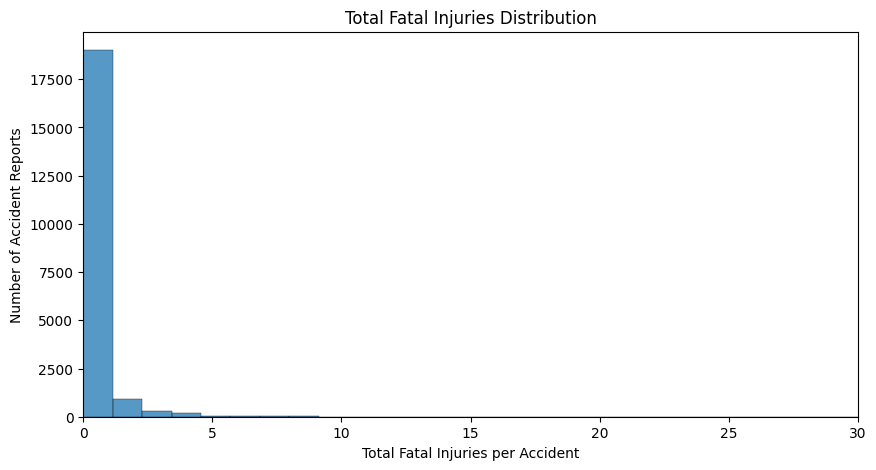

In [71]:
# Histograms to visualize the distribution
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x=df_USA_airplane['Total.Fatal.Injuries'], bins=200)
ax.set_title("Total Fatal Injuries Distribution")
ax.set_xlim(0,30)
ax.set_xlabel("Total Fatal Injuries per Accident")
ax.set_ylabel("Number of Accident Reports")

In [52]:
df_USA_airplane['Total.Serious.Injuries'].value_counts()
df_USA_airplane['Total.Serious.Injuries'].describe()

count    18017.000000
mean         0.281567
std          1.620812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        137.000000
Name: Total.Serious.Injuries, dtype: float64

Text(0, 0.5, 'Number of Accident Reports')

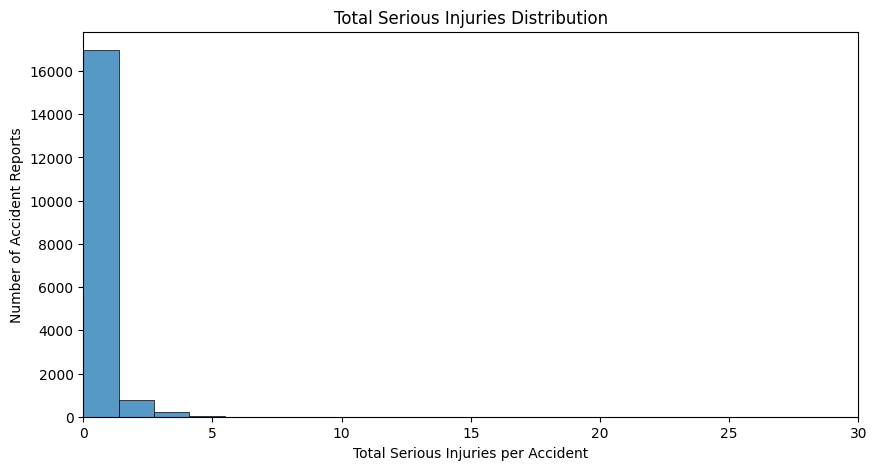

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x=df_USA_airplane['Total.Serious.Injuries'], bins=100)
ax.set_title("Total Serious Injuries Distribution")
ax.set_xlim(0,30)
ax.set_xlabel("Total Serious Injuries per Accident")
ax.set_ylabel("Number of Accident Reports")

In [54]:
df_USA_airplane['Total.Minor.Injuries'].value_counts()
df_USA_airplane['Total.Minor.Injuries'].describe()

count    18302.000000
mean         0.218992
std          0.820689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: Total.Minor.Injuries, dtype: float64

Text(0, 0.5, 'Number of Accident Reports')

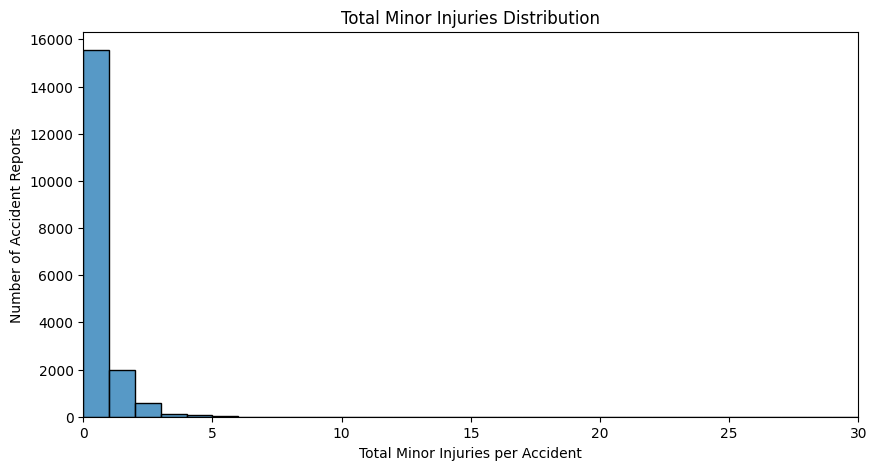

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x=df_USA_airplane['Total.Minor.Injuries'], bins=50)
ax.set_title("Total Minor Injuries Distribution")
ax.set_xlim(0,30)
ax.set_xlabel("Total Minor Injuries per Accident")
ax.set_ylabel("Number of Accident Reports")

Based on the value count function and brief histogram visualizations on these columns, we can see that  majority of their values are at **0**. Also, they are highly **right skewed**. Therefore, our strategy to handle the missing values from these columns is to impute with the **median** value of each column.

In [56]:
df_USA_airplane['Total.Fatal.Injuries'] = df_USA_airplane['Total.Fatal.Injuries'].fillna(df_USA_airplane['Total.Fatal.Injuries'].median())
df_USA_airplane['Total.Serious.Injuries'] = df_USA_airplane['Total.Serious.Injuries'].fillna(df_USA_airplane['Total.Serious.Injuries'].median())
df_USA_airplane['Total.Minor.Injuries'] = df_USA_airplane['Total.Minor.Injuries'].fillna(df_USA_airplane['Total.Minor.Injuries'].median())

df_USA_airplane['Total.Fatal.Injuries'].isna().sum()
df_USA_airplane['Total.Serious.Injuries'].isna().sum()
df_USA_airplane['Total.Minor.Injuries'].isna().sum()

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/3669202890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Total.Fatal.Injuries'] = df_USA_airplane['Total.Fatal.Injuries'].fillna(df_USA_airplane['Total.Fatal.Injuries'].median())
/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/3669202890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Total.Serious.Injuries'] = df_USA_airplane['Total.Serious.Injuries'].fillna(df_USA_airplane['Total.S

0

#### Creating **Year** and **Month** columns

The **Event Date** column has the year, month, and day of the accident. Here, we are creating two separte columns to extract the **Year** and **Month** of the **Event Date**, and changing the data type to the integar instead of string for future analyses.

In [57]:
df_USA_airplane['Event.Date'].sort_values(ascending=False)

# Spliting the "Event.Date" column to create "Year" and "Month columns"
df_USA_airplane['Year'] = df_USA_airplane['Event.Date'].str.split("-").str[0]
df_USA_airplane['Month'] = df_USA_airplane['Event.Date'].str.split("-").str[1]

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/1306892535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Year'] = df_USA_airplane['Event.Date'].str.split("-").str[0]
/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/1306892535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Month'] = df_USA_airplane['Event.Date'].str.split("-").str[1]


In [58]:
# Changing the data type to integers
df_USA_airplane['Year'] = df_USA_airplane['Year'].astype(int)
df_USA_airplane['Month'] = df_USA_airplane['Month'].astype(int)

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/2714931733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Year'] = df_USA_airplane['Year'].astype(int)
/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/2714931733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Month'] = df_USA_airplane['Month'].astype(int)


## Month with most accidents

Knowing the month with most accident records can provide an important insight to companies operating aircrafts because the companies can ensure appropriate preperation can be done during the most accident-prone time of the year. This may include budgeting for more repairs or completing mendatory safety training for the staff members.

First, we visualize the number of records in the clean dataframe per month.

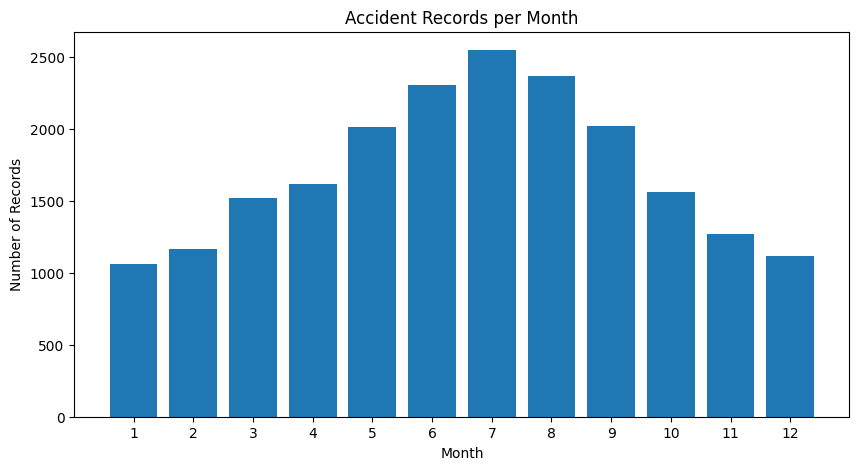

In [59]:
# Bar graph of the number of records per month
x = df_USA_airplane['Month'].value_counts().sort_index().index
y = df_USA_airplane['Month'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, y)
ax.set_title('Accident Records per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Records')
ax.set_xticks(range(1,13))

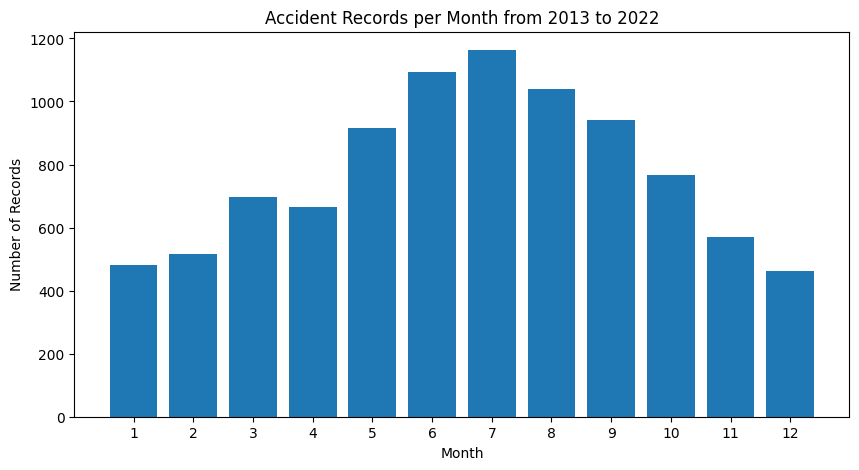

In [60]:
# Bar graph again, but focusing on the most recent 10 years
df_recent = df_USA_airplane.loc[df_USA_airplane['Year'] >= 2013]
x = df_recent['Month'].value_counts().sort_index().index
y = df_recent['Month'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, y)
ax.set_title('Accident Records per Month from 2013 to 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Records')
ax.set_xticks(range(1,13))

In [61]:
# Determining the month with most accident records by calculating modes
risk_month = df_USA_airplane['Month'].mode()
risk_month_ten_years = df_recent['Month'].mode()

risk_month, risk_month_ten_years

(0    7
 Name: Month, dtype: int64,
 0    7
 Name: Month, dtype: int64)

Based on the two bar graphs presented above, **July** appears to be the month with most accidents on airplane. Also, this trend seems to be true when we look at the data to its entirety, or only the most recent 10 years. This is further validated by calculating the mode of both time periods.

Since July is the month with the most reported accident, therefore heightened risk, we suggest that implementing preventative measures such as completing additional safety training of the staff members or budgeting more cost for aircraft repair for the month can be beneficial.

## Number of Damaged Airplanes per Year

The aircrafts will most likely experience different degrees of damage after accidents. Having appropriate strategies to repair aircrafts in different severities of damage can help the company become more financially efficient or prevent severe damages to the airplanes. For the purpose of this analysis, we only focus on the most recent 10 years.

First step is to group the dataframe accordingly. We decide to group by the **Aircraft Damage** column, which is a categorical measure. Then, we sort by the **Year** column can calculate the total counts of records.

In [62]:
# Grouping the dataframe
grouped_aircraft_damage = df_recent.groupby(['Aircraft.damage'])
grouped_aircraft_damage['Year'].value_counts()

Aircraft.damage  Year
Destroyed        2019    135
                 2018    113
                 2015    111
                 2017    111
                 2016    104
                 2020     97
                 2013     95
                 2021     93
                 2014     84
                 2022     78
Minor            2019     12
                 2022      9
                 2021      7
                 2013      6
                 2017      6
                 2016      5
                 2015      5
                 2014      5
                 2018      3
                 2020      2
Substantial      2016    866
                 2018    837
                 2013    832
                 2017    825
                 2015    802
                 2014    801
                 2019    791
                 2022    789
                 2021    754
                 2020    743
Unknown          2021     36
                 2022     30
                 2015     21
                 2017

In [63]:
# Value counts of each category in the Aircraft.damage column
grouped_aircraft_damage.get_group('Destroyed')['Year'].value_counts()
grouped_aircraft_damage.get_group('Substantial')['Year'].value_counts()
grouped_aircraft_damage.get_group('Minor')['Year'].value_counts()
grouped_aircraft_damage.get_group('Unknown')['Year'].value_counts()

Year
2021    36
2022    30
2015    21
2017    19
2018    18
2019    18
2016    14
2014    13
2020    11
2013    10
Name: count, dtype: int64

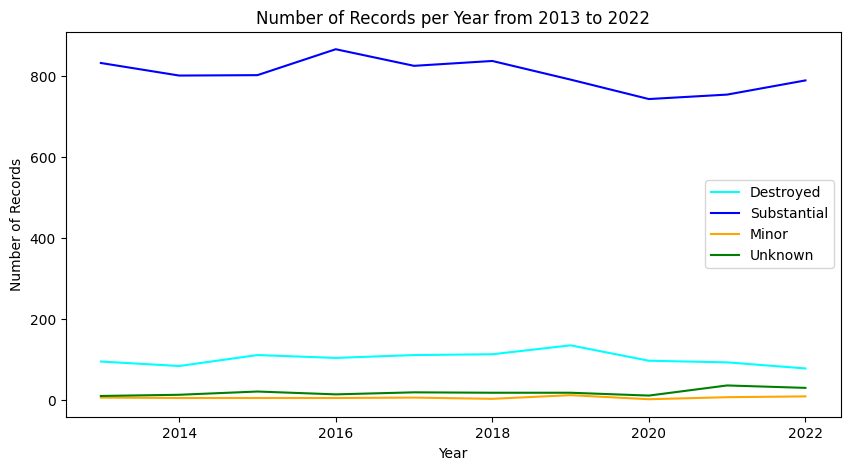

In [64]:
# Visualizing via line graph
fig, ax = plt.subplots(figsize=(10,5))
x_des = grouped_aircraft_damage.get_group('Destroyed')['Year'].value_counts().sort_index().index
y_des = grouped_aircraft_damage.get_group('Destroyed')['Year'].value_counts().sort_index().values
ax.plot(x_des,y_des, 'cyan', label='Destroyed')

x_sub = grouped_aircraft_damage.get_group('Substantial')['Year'].value_counts().sort_index().index
y_sub = grouped_aircraft_damage.get_group('Substantial')['Year'].value_counts().sort_index().values
ax.plot(x_sub,y_sub, 'b', label='Substantial')

x_minor = grouped_aircraft_damage.get_group('Minor')['Year'].value_counts().sort_index().index
y_minor = grouped_aircraft_damage.get_group('Minor')['Year'].value_counts().sort_index().values
ax.plot(x_minor,y_minor, 'orange', label='Minor')

x_unknown = grouped_aircraft_damage.get_group('Unknown')['Year'].value_counts().sort_index().index
y_unknown = grouped_aircraft_damage.get_group('Unknown')['Year'].value_counts().sort_index().values
ax.plot(x_unknown,y_unknown, 'g', label='Unknown')

ax.set_title("Number of Records per Year from 2013 to 2022")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Records")
ax.legend()

As demonstrated in the value counts and the line graphs, significantly higher number of accidents have led to substantial damage in the airplane during last 10 years. Therefore, we suggest that when planning for future repairs of the airplanes, the company should expect a significant amount of cases to entail substantial repairment needed every year. This may involve assigning appropriate personel to repair, or ensuring enough materials needed for substantial repairment. Furthermore, the overall safety policies of operating airplanes can be re-evaluated, as most airplane damages post-accidents are substantial.

## Number of Injuries per Top 5 Makes of Airplanes

When deciding which makes of airplanes to purchase, evaluating the risk associated with certain makes can provide important insight. Here, we aim to analyze and determine the make of airplanes associated with the most injuries of passengers after accidents during last 10 years.

First, we need to clean the **Make** column because the format of entries are not consistent.

In [65]:
# Changing the "Make" values to title case
df_recent['Make'] = df_recent['Make'].str.lower()
df_recent['Make'].value_counts()

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/204647013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Make'] = df_recent['Make'].str.lower()


Make
cessna                      3203
piper                       1879
beech                        671
mooney                       170
boeing                       168
                            ... 
volaircraft                    1
drake                          1
airtime aircraft inc           1
p z l -warszawa-cnpsl          1
arado-flugzeugwerke gmbh       1
Name: count, Length: 644, dtype: int64

We also want to make sure that we are capturing some different names used to indicate the same make. Here, we create a dictionary to guide us with this transformation. We want to simplify the values in the **Make** column via running through the dictionary. If the make in the dataframe contains one of the keys of the dictionary, it should return the values of the corresponding key as a new value as the make. This way, we can capture the number of injuries per make more accurately.

In [66]:
make_dict = {
    '737': 'boeing',
    '777': 'boeing',
    'airbus': 'airbus',
    'boeing': 'boeing',
    'bombardier': 'bombardier',
    'douglas': 'douglas',
    'embraer': 'embraer',
    'diamond': 'diamond',
    'gruman': 'gruman',
    'gulfstream': 'gulfstream',
    'mcdonnell': 'boeing',
    'mooney': 'mooney',
    'piper': 'piper',
    'taylor': 'taylor'

}

# Creating a function to clean the make values
def clean_make(make):
    new_entry = make
    for key in make_dict.keys():
        if key in make:
            new_entry = make_dict[key]
        else:
            continue
    return new_entry
            

In [67]:
# Cleaning the "Make" column by capturing different names for the same make
df_recent['Make'] = df_recent['Make'].map(clean_make)

# Checking if the value counts are different
df_recent['Make'].value_counts()

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_16020/717645550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Make'] = df_recent['Make'].map(clean_make)


Make
cessna                      3203
piper                       1907
beech                        671
mooney                       194
boeing                       192
                            ... 
broussard                      1
northwing                      1
fairchild heli-porter          1
volaircraft                    1
arado-flugzeugwerke gmbh       1
Name: count, Length: 606, dtype: int64

In [68]:
# Creating a list of 5 makes with most number of accident reports
top_5_makes = df_recent['Make'].value_counts().index[:5]

Now that we have stored 5 makes of airplanes that have the most accident reports, we want to group the dataframe by these top 5 makes, and analyze which make of these 5 resulted in the highest number of injuries.

In [69]:
# Grouping on the top 5 makes
grouped_make = df_recent.loc[df_recent['Make'].isin(top_5_makes)].groupby('Make')
grouped_make['Total.Fatal.Injuries'].sum()
grouped_make['Total.Serious.Injuries'].sum()
grouped_make['Total.Minor.Injuries'].sum()

Make
beech     124.0
boeing    135.0
cessna    427.0
mooney     47.0
piper     355.0
Name: Total.Minor.Injuries, dtype: float64

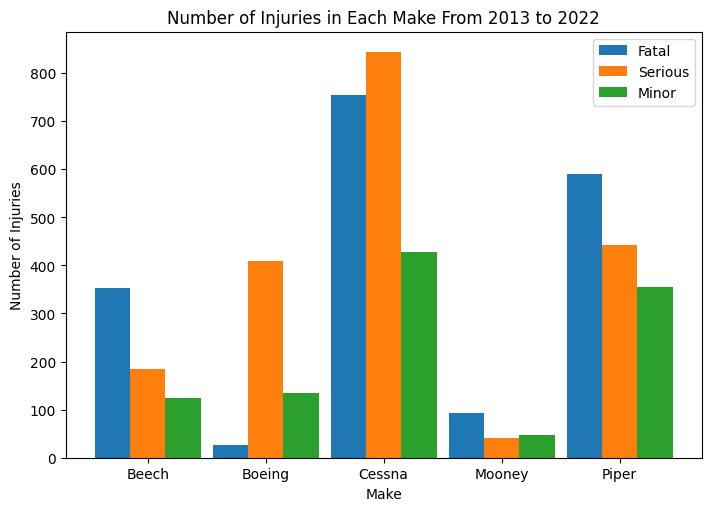

In [70]:
# Creating a grouped bar graph
serious_list = list(grouped_make['Total.Serious.Injuries'].sum().index)

fig, ax = plt.subplots(figsize=(7,5), layout='constrained')

x = np.arange(len(top_5_makes))
y_fatal = grouped_make['Total.Fatal.Injuries'].sum().values
ax.bar(x - 0.3, y_fatal,0.3, label = 'Fatal')

x_serious = [str.title() for str in serious_list]
y_serious = grouped_make['Total.Serious.Injuries'].sum().values
ax.bar(x_serious, y_serious, 0.3, label = 'Serious')

y_minor = grouped_make['Total.Minor.Injuries'].sum().values
ax.bar(x + 0.3,y_minor, 0.3, label = 'Minor')

ax.set_title("Number of Injuries in Each Make From 2013 to 2022")
ax.set_xlabel("Make")
ax.set_ylabel("Number of Injuries")
ax.legend()

Across 3 different severities of injuries (Fatal, Serious and Minor), **Cessna** appears to be the make that had the highest number of people with injuries. This finding suggests that among the 5 makes that had the most accident reports, **Cessna** has the most fatal, serious, and minor injuries. However, it is important to note that there can be several caveats. For example, these 5 makes most likely have many accident reports because they are the most widely used airplane makes. Therefore, while this analysis can provide a great insight into what make has reported the most injuries during last 10 years, further investigation is warranted.

## Conclusions

This project aims to provide three recommendations for the stakeholders to consider when purchasing and operating airplanes in the United States based on data from 2013 to 2022:

- **Additional safety training for staff members before July.** The most accident prone time of the year is July. Implementing additional safety training for members before this time hits can provide preventative measures.

- **Stricter safety policies for the airplanes operating.** Our analysis on the airplane damage during last 10 years indicates that many post-accident airplanes have substantial damages. Therefore, we recommend that stricter safety policies to be implemented to prevent airplanes that are in risk for substantial damanges from operating, and to repair them before they are in need of substantial repair. Further analyses on various related topics such as cost of applying stricter safety policies, age of airplanes, and hours of operation can provide more in-depth information.

- **Be cautious when purchasing from airplane makes with the most accident reports, such as Cessna** Among 5 makes that had most accidents reported, Cessna had the biggest number of injuries. It may be beneficial to keep this information in mind when purchasing new airplanes. However, these top 5 makes most likely have many accidents because they are the most widely used airplane makes. Also, each make has several different models of airplanes that may have different safety measures. Therefore, further research is warranted on the actual safety of these airplanes.

## Future Insights

In addition to the recommendations proposed above, further analyses can be beneficial to the stakeholders assessing risks in aviation business model. Here are some potential future insights:

- **Consider engine configurations.** Evaluating the relationship between engine configurations and accidents can provide valuable insights on what type of airplane is the safest.

- **Consider insurance options.** Based on the risk assessment provided in this project, the stakeholders can consider different insurance options that would be more suitable.

- **Develop safety policies for weather conditions.** Having severe weather conditions can increase the risk of airplane operation and safety. Therefore, development or re-evaluation of safety policies can be beneficial to the stakeholders for reducing potential risks associated with flying airplanes in severe weather conditions.